In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Question: 1

# **DCT (Discrete Cosine Transform)**
1D DCT Transformation Matrix (C) of length N is given by:

$$
C(k,n) = \left\{
        \begin{array}{ll}
            \frac{1}{\sqrt N} & \quad k = 0, \quad 0 \leq n \leq N-1 \\
            \sqrt \frac{2}{N}cos(\frac{\pi(2n+1)k}{2N}) & \quad  1 \leq K \leq N-1, \quad 0 \leq n \leq N-1
        \end{array}
    \right.
$$

2D DCT of a given 2D input:<br>
$$ A^{'} = CAC^{T} $$

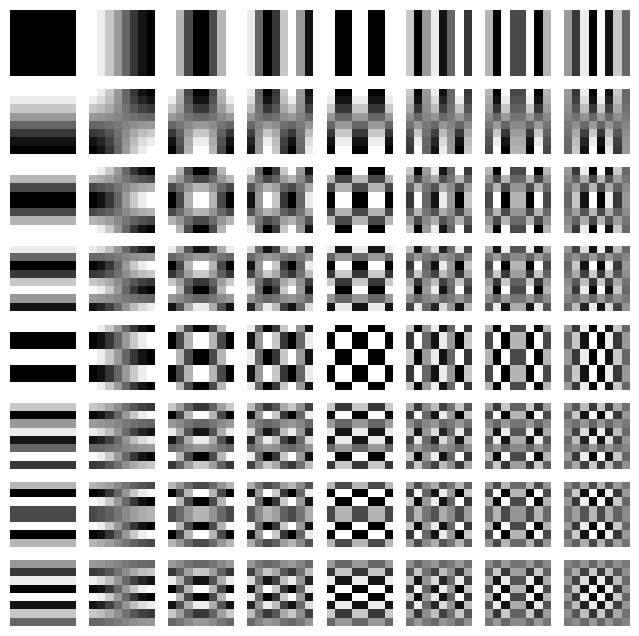

In [2]:
N=8
C = np.zeros([N,N])
for k in range(N):
        for n in range(N):
            if k==0:
                C[k][n] = 1/np.sqrt(N)
            else:
                C[k][n] = np.sqrt(2/N)*np.cos(np.pi*(2*n+1)*k/(2*N))
fig, ax = plt.subplots(N, N, figsize=(8, 8))
curr_fig = 0
for k in range(N):
    for l in range(N):
        img1_reconstructed = np.outer(C[k,:],C[l,:])
        #ax[curr_fig][l].set_title("Reconstructed_Image k = "+str(k))
        ax[curr_fig][l].imshow(img1_reconstructed,cmap="gray")
        ax[curr_fig,l].axis('off')
    curr_fig += 1  

In [3]:
def DCT(img):
    N = img.shape[0]
    C = np.zeros([N,N])
    for k in range(N):
        for n in range(N):
            if k==0:
                C[k][n] = 1/np.sqrt(N)
            else:
                C[k][n] = np.sqrt(2/N)*np.cos(np.pi*(2*n+1)*k/(2*N))
    return C@img@C.T 

# **WHT ( Walsh-Haddamard Transform)**

The haddamard transformation matrix $H_n$ with N = $2^n$ for n=1,2,3. , N-dimension of matrix
$$ 
H_1 = \frac{1}{\sqrt 2}
\begin{bmatrix}1 & 1\\1 & -1\end{bmatrix}
$$

$$ H_n = H_{n-1} ⨂ H_1 $$


2D WHT of a given 2D input:
$$A' = H.A.H^{T} = H.A.H$$

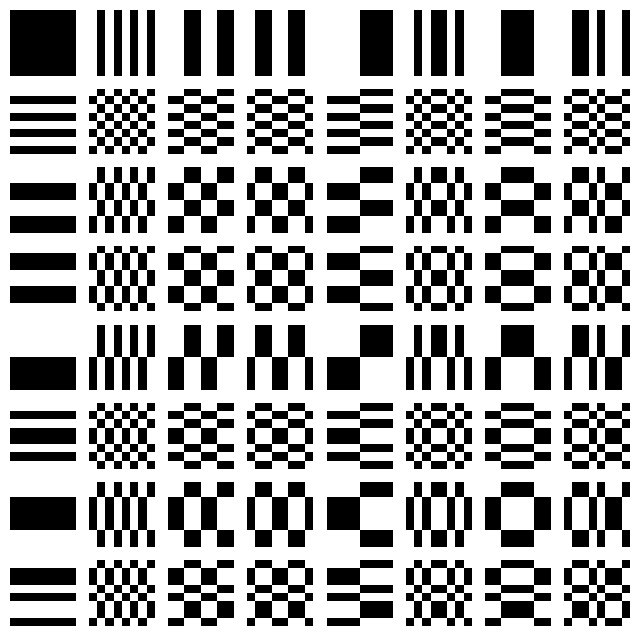

In [4]:
N = 8
n = int(np.log2(N))
H1 = np.array([[1,1],[1,-1]])*1/np.sqrt(2)
H = H1.copy()
for i in range(n-1):
        H = np.kron(H,H1)
fig, ax = plt.subplots(N, N, figsize=(8, 8))
curr_fig = 0
for k in range(N):
    for l in range(N):
        img1_reconstructed = np.outer(H[k,:],H[l,:])
        #ax[curr_fig][l].set_title("Reconstructed_Image k = "+str(k))
        ax[curr_fig][l].imshow(img1_reconstructed,cmap="gray")
        ax[curr_fig,l].axis('off')
    curr_fig += 1  

In [5]:
def WHT(img):
    N = img.shape[0]
    n = int(np.log2(N))
    H1 = np.array([[1,1],[1,-1]])*1/np.sqrt(2)
    H = H1.copy()
    for i in range(n-1):
        H = np.kron(H,H1)
    return H@img@H.T

In [6]:
def energy_packing_efficiency(img_t, m):
    return np.sum(sorted(np.diag(img_t),reverse=True)[0:m])/np.sum(np.diag(img_t))

In [7]:
def decorrelation_efficiency(img_t, img):
    alpha = np.sum(np.abs(img_t)) - np.sum(np.abs(np.diag(img_t)))
    beta = np.sum(np.abs(img)) - np.sum(np.abs(np.diag(img)))
    return 1-alpha/beta

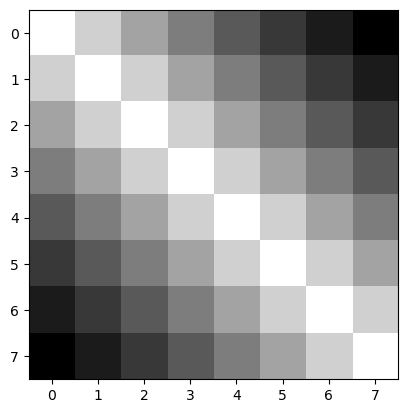

In [8]:
rho = 0.91
R = np.ones([8,8])
for i in range(R.shape[0]):
    temp = rho**i
    for j in range(R.shape[1]):
        R[i][j] = temp
        temp = temp/rho if j<i else temp*rho
plt.imshow(R,cmap="gray");

In [9]:
R_t = DCT(R)

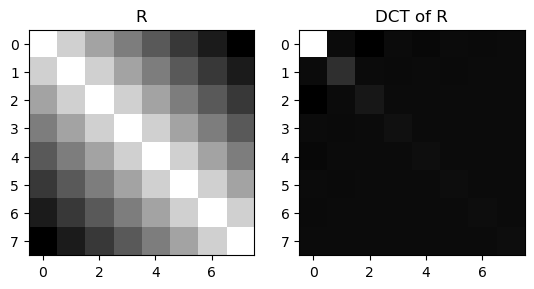

In [10]:
plt.subplot(121)
plt.imshow(R,cmap="gray")
plt.title("R")
plt.subplot(122)
plt.imshow(R_t,cmap="gray")
plt.title("DCT of R");

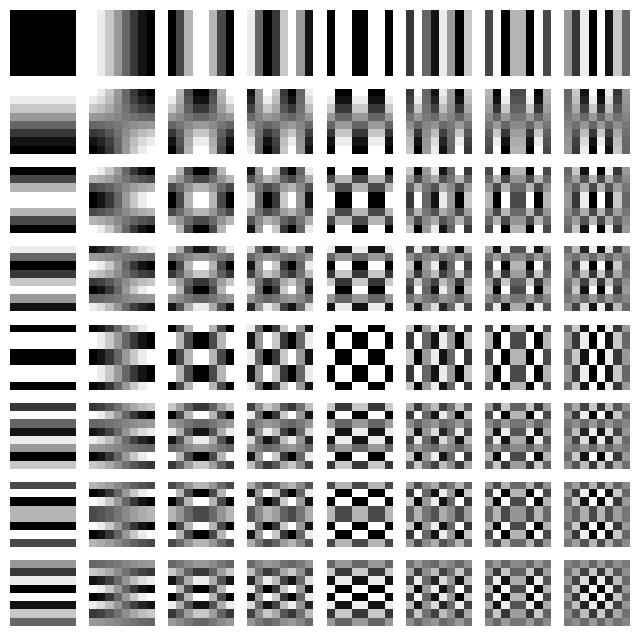

In [11]:
k_t = 8
fig, ax = plt.subplots(k_t, k_t, figsize=(8, 8))
curr_fig = 0
img1_reconstructed = np.zeros([k_t,k_t])
for k in range(k_t):
    for j in range(k_t):
        img1_reconstructed = R_t[k,j]*np.outer(C.T[:,k],C[j,:])
        #ax[curr_fig][j].set_title("Reconstructed_Image k = "+str(k))
        ax[curr_fig][j].imshow(img1_reconstructed,cmap="gray")
        ax[curr_fig, j].axis('off')
    curr_fig += 1  
plt.show()

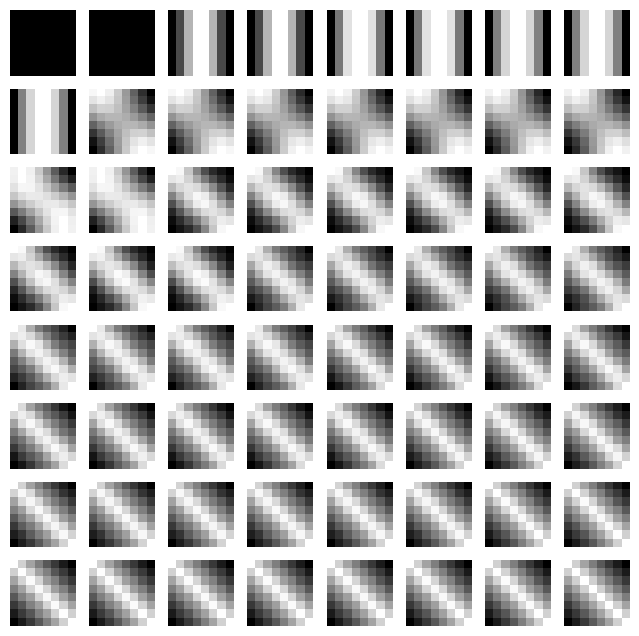

In [12]:
k_t = 8
fig, ax = plt.subplots(k_t, k_t, figsize=(8, 8))
curr_fig = 0
img1_reconstructed = np.zeros([k_t,k_t])
for k in range(k_t):
    for j in range(k_t):
        img1_reconstructed += R_t[k,j]*np.outer(C.T[:,k],C[j,:])
        #ax[curr_fig][j].set_title("Reconstructed_Image k = "+str(k))
        ax[curr_fig][j].imshow(img1_reconstructed,cmap="gray")
        ax[curr_fig, j].axis('off')
    curr_fig += 1  
plt.show()

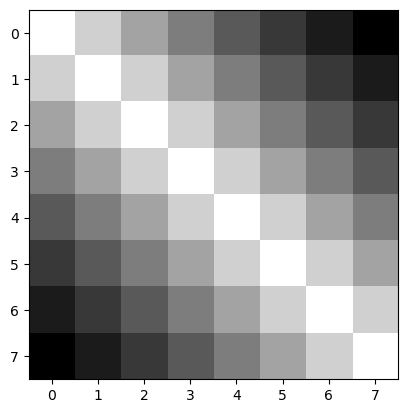

In [13]:
plt.imshow(C.T@R_t@C,cmap="gray");

In [14]:
EPE_DCT = []
print("Decorrelation efficiency of DCT=",decorrelation_efficiency(R_t, R))
print("-"*75)
print("Energy packing efficiency of DCT considering highest m diagonal values:")
for m in range(1,R.shape[0]+1):
    print(" m = {}: Energy packing efficiency = {}".format(m,energy_packing_efficiency(R_t, m)))
    EPE_DCT.append(energy_packing_efficiency(R_t, m))

Decorrelation efficiency of DCT= 0.9804711989227339
---------------------------------------------------------------------------
Energy packing efficiency of DCT considering highest m diagonal values:
 m = 1: Energy packing efficiency = 0.7929390437106035
 m = 2: Energy packing efficiency = 0.909171896826679
 m = 3: Energy packing efficiency = 0.9481665650480071
 m = 4: Energy packing efficiency = 0.966789221247316
 m = 5: Energy packing efficiency = 0.9785067153152944
 m = 6: Energy packing efficiency = 0.9869852173533923
 m = 7: Energy packing efficiency = 0.993879531910646
 m = 8: Energy packing efficiency = 1.0


In [15]:
R_t = WHT(R)

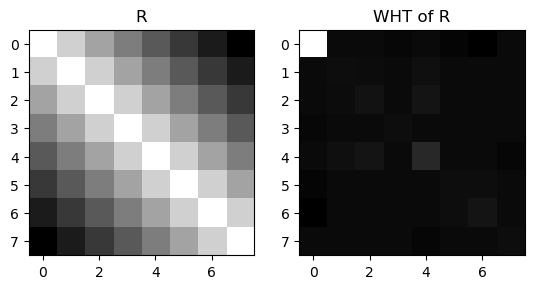

In [16]:
plt.subplot(121)
plt.imshow(R,cmap="gray")
plt.title("R")
plt.subplot(122)
plt.imshow(R_t,cmap="gray")
plt.title("WHT of R");

In [17]:
EPE_WHT = []
print("Decorrelation efficiency of WHT=",decorrelation_efficiency(R_t, R))
print("-"*75)
print("Energy packing efficiency of WHT considering highest m diagonal values:")
for m in range(1,R.shape[0]+1):
    print(" m = {}: Energy packing efficiency = {}".format(m,energy_packing_efficiency(R_t, m)))
    EPE_WHT.append(energy_packing_efficiency(R_t, m))

Decorrelation efficiency of WHT= 0.9485667904674057
---------------------------------------------------------------------------
Energy packing efficiency of WHT considering highest m diagonal values:
 m = 1: Energy packing efficiency = 0.7929390437106035
 m = 2: Energy packing efficiency = 0.8924713750000002
 m = 3: Energy packing efficiency = 0.9268012480731036
 m = 4: Energy packing efficiency = 0.9550000000000002
 m = 5: Energy packing efficiency = 0.9667174940679786
 m = 6: Energy packing efficiency = 0.9784213750000001
 m = 7: Energy packing efficiency = 0.9899804847054786
 m = 8: Energy packing efficiency = 1.0000000000000002


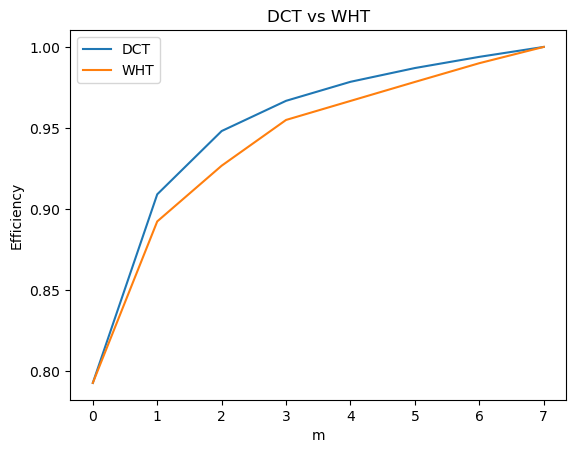

In [18]:
X = np.arange(8)
plt.plot(X,EPE_DCT)
plt.plot(X,EPE_WHT)
plt.xlabel("m")
plt.ylabel("Efficiency")
plt.legend(["DCT","WHT"])
plt.title("DCT vs WHT");

DCT is decorrelating the R matrix more efficiently when compared to WHT

# Question: 2

In [19]:
alpha = rho/(1+rho**2)
beta = (1-rho**2)/(1+rho**2)
alpha,beta

(0.4977845850883431, 0.09403205513921555)

In [20]:
beta_Rinverse = beta*np.linalg.pinv(R)
print(beta_Rinverse)

[[ 5.47016028e-01 -4.97784585e-01 -1.26580820e-15  1.38847415e-15
   1.21100001e-15 -3.48945477e-15  3.21541382e-15 -1.46155174e-15]
 [-4.97784585e-01  1.00000000e+00 -4.97784585e-01 -9.96987078e-16
  -5.89840523e-16  2.75606899e-15 -2.25496554e-15  1.33627587e-15]
 [ 7.12506472e-16 -4.97784585e-01  1.00000000e+00 -4.97784585e-01
  -9.18689663e-16  1.08572415e-15 -2.08793105e-16 -5.48081902e-16]
 [-6.78577592e-16  1.49026079e-15 -4.97784585e-01  1.00000000e+00
  -4.97784585e-01 -8.76931042e-16  2.58381468e-16  4.38465521e-16]
 [ 8.03853456e-16 -1.31539656e-15  2.08793105e-16 -4.97784585e-01
   1.00000000e+00 -4.97784585e-01 -1.04396553e-16  1.04396553e-17]
 [-1.12226294e-16 -5.01103453e-16  9.18689663e-16  1.25275863e-16
  -4.97784585e-01  1.00000000e+00 -4.97784585e-01  7.04676731e-17]
 [-4.59344832e-16  1.08572415e-15 -6.68137937e-16 -3.78437503e-16
   4.01926728e-16 -4.97784585e-01  1.00000000e+00 -4.97784585e-01]
 [ 5.01103453e-16 -8.35172421e-16  2.00963364e-16  3.02750003e-16
  -

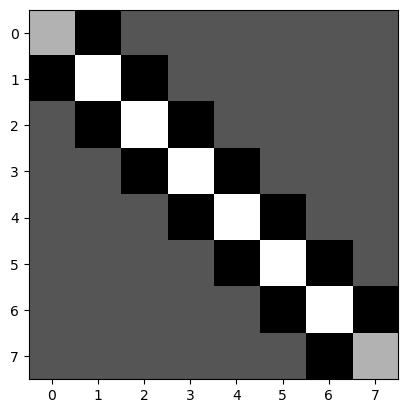

In [21]:
plt.imshow(beta_Rinverse,cmap="gray");

In [22]:
Q = np.identity(R.shape[0])
for i in range(R.shape[0]):
    if (i==0):
        Q[i][i] = 1-alpha
        Q[i][i+1]=-1*alpha
    elif (i==R.shape[0]-1):
        Q[i][i] = 1-alpha
        Q[i][i-1]=-1*alpha
    else:
        Q[i][i-1]=-1*alpha
        Q[i][i+1]=-1*alpha
Q

array([[ 0.50221541, -0.49778459,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [-0.49778459,  1.        , -0.49778459,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        , -0.49778459,  1.        , -0.49778459,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        , -0.49778459,  1.        , -0.49778459,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , -0.49778459,  1.        ,
        -0.49778459,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        , -0.49778459,
         1.        , -0.49778459,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.49778459,  1.        , -0.49778459],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.49778459,  0.50221541]])

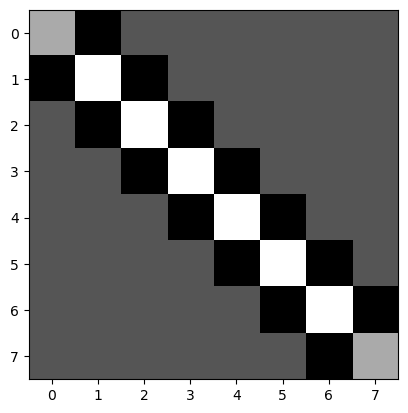

In [23]:
plt.imshow(Q,cmap="gray");

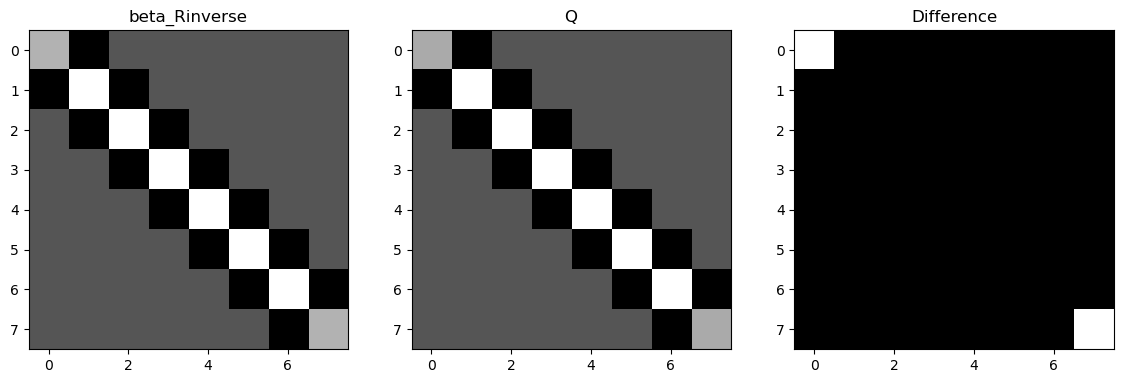

In [24]:
plt.figure(figsize=[14,8])
plt.subplot(131)
plt.imshow(beta_Rinverse,cmap="gray")
plt.title("beta_Rinverse")
plt.subplot(132)
plt.imshow(Q,cmap="gray")
plt.title("Q")
plt.subplot(133)
plt.imshow(beta_Rinverse-Q,cmap="gray")
plt.title("Difference");

In [25]:
print(np.max(np.abs(beta_Rinverse-Q)))
beta_Rinverse-Q

0.044800612657951766


array([[ 4.48006127e-02, -8.32667268e-16, -1.26580820e-15,
         1.38847415e-15,  1.21100001e-15, -3.48945477e-15,
         3.21541382e-15, -1.46155174e-15],
       [-1.88737914e-15,  2.22044605e-15,  5.55111512e-17,
        -9.96987078e-16, -5.89840523e-16,  2.75606899e-15,
        -2.25496554e-15,  1.33627587e-15],
       [ 7.12506472e-16, -1.33226763e-15,  8.88178420e-16,
         5.55111512e-17, -9.18689663e-16,  1.08572415e-15,
        -2.08793105e-16, -5.48081902e-16],
       [-6.78577592e-16,  1.49026079e-15, -8.32667268e-16,
         0.00000000e+00,  1.11022302e-16, -8.76931042e-16,
         2.58381468e-16,  4.38465521e-16],
       [ 8.03853456e-16, -1.31539656e-15,  2.08793105e-16,
        -3.33066907e-16,  4.44089210e-16,  2.22044605e-16,
        -1.04396553e-16,  1.04396553e-17],
       [-1.12226294e-16, -5.01103453e-16,  9.18689663e-16,
         1.25275863e-16, -6.66133815e-16,  2.22044605e-16,
         5.55111512e-17,  7.04676731e-17],
       [-4.59344832e-16,  1.085724

beta_Rinverse and Q are nearly close except the first and last element

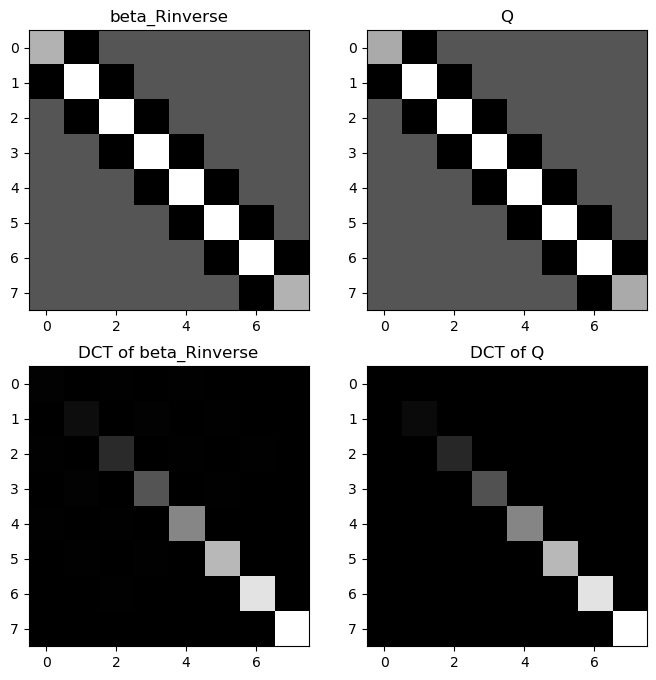

In [26]:
plt.figure(figsize=[8,8])
plt.subplot(221)
plt.imshow(beta_Rinverse,cmap="gray")
plt.title("beta_Rinverse")
plt.subplot(222)
plt.imshow(Q,cmap="gray")
plt.title("Q")
plt.subplot(223)
plt.imshow(DCT(beta_Rinverse),cmap="gray")
plt.title("DCT of beta_Rinverse")
plt.subplot(224)
plt.imshow(DCT(Q),cmap="gray")
plt.title("DCT of Q");

DCT matrix almost diagonalises both Tridiagonal matrix and the beta_Rinverse matrix because triadiagonal matrix is diagonalised by the DCT matrix and the beta_Rinverse matrix is diagonalised because it is almost close to the tridiagonal matrix because the rho is close to 1

# Question: 3

In [27]:
from scipy.io import loadmat

In [28]:
data = loadmat("imageFile.mat")
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Wed Mar  6 09:21:09 2013',
 '__version__': '1.0',
 '__globals__': [],
 'g': array([[255, 255, 255, 255, 255, 255, 255, 255],
        [255, 255, 255, 100, 100, 100, 255, 255],
        [255, 255, 100, 150, 150, 150, 100, 255],
        [255, 255, 100, 150, 200, 150, 100, 255],
        [255, 255, 100, 150, 150, 150, 100, 255],
        [255, 255, 255, 100, 100, 100, 255, 255],
        [255, 255, 255, 255,  50, 255, 255, 255],
        [ 50,  50,  50,  50, 255, 255, 255, 255]], dtype=uint8)}

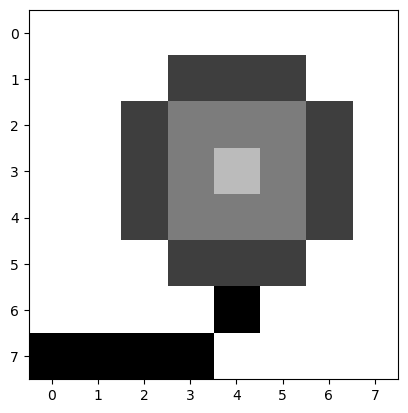

In [29]:
img = np.array(data['g'],dtype=float)
plt.imshow(img,cmap="gray");

In [30]:
def eigen_decompose(img):
    w,v = np.linalg.eig(img)
    idx = w.argsort()[::-1]
    eigenValues = w[idx]
    eigenVectors = v[:,idx]
    return eigenVectors, eigenValues

# **Singular value decompisition (SVD)**
Any matrix $A_{m \times n}$ can be written as:
\begin{equation*}
A_{m*n} = U_{m*m}.\Sigma_{m*n}.V_{n*n}^H
\end{equation*}

where U and V contain eigenvectors of $AA^{T}$ and $A^TA$ respectively and $\Sigma$ contains the singular values

In [31]:
def SVD(img):
    m, n = img.shape[0],img.shape[1]
    r = min(m, n)
    Sigma = np.zeros((m, n))
    g1 = img@(img.T)
    g2 = (img.T)@img
    U,e1 = eigen_decompose(g1)
    V,e2 = eigen_decompose(g2)
    for i in range(r):
        if m<=n:
            Sigma[i, i] = np.sqrt(e1[i])
        else:
            Sigma[i, i] = np.sqrt(e2[i])
            
        v = V[:, i]
        if np.sum((img@v-Sigma[i, i]*U[:, i])**2) > np.sum((img@v+Sigma[i, i]*U[:, i])**2):
            V[:, i] = -v
    return U, Sigma, V.T

def reconsrtuct_from_SVD(U, s, Vh, k=0):
    k = len(s) - k
    S = np.zeros( (len(U), len(Vh)) )
    for i in range(k):
        S[i][i]= s[i,i]
    return np.abs((np.matmul(U,np.matmul(S,Vh))))

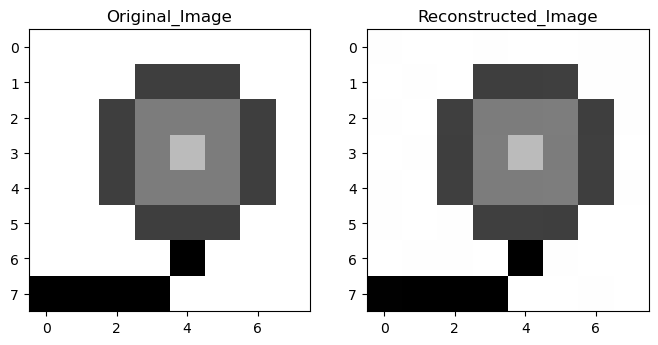

In [32]:
U, s, Vh = SVD(img) 
img1_reconstructed = reconsrtuct_from_SVD(U, s, Vh).astype(np.int)
plt.figure(figsize=[8,8])
plt.subplot(121)
plt.imshow(img,cmap="gray")
plt.title("Original_Image")
plt.subplot(122)
plt.imshow(img1_reconstructed,cmap="gray")
plt.title("Reconstructed_Image");

In [33]:
img1_reconstructed

array([[254, 255, 255, 254, 255, 255, 254, 254],
       [255, 254, 255,  99,  99, 100, 254, 254],
       [254, 255, 100, 149, 149, 150,  99, 254],
       [255, 254,  99, 150, 200, 149, 100, 255],
       [254, 255, 100, 149, 149, 150,  99, 254],
       [254, 255, 254, 100, 100,  99, 255, 255],
       [255, 254, 254, 255,  49, 254, 255, 255],
       [ 50,  49,  49,  49, 255, 255, 254, 255]])

# Question: 4

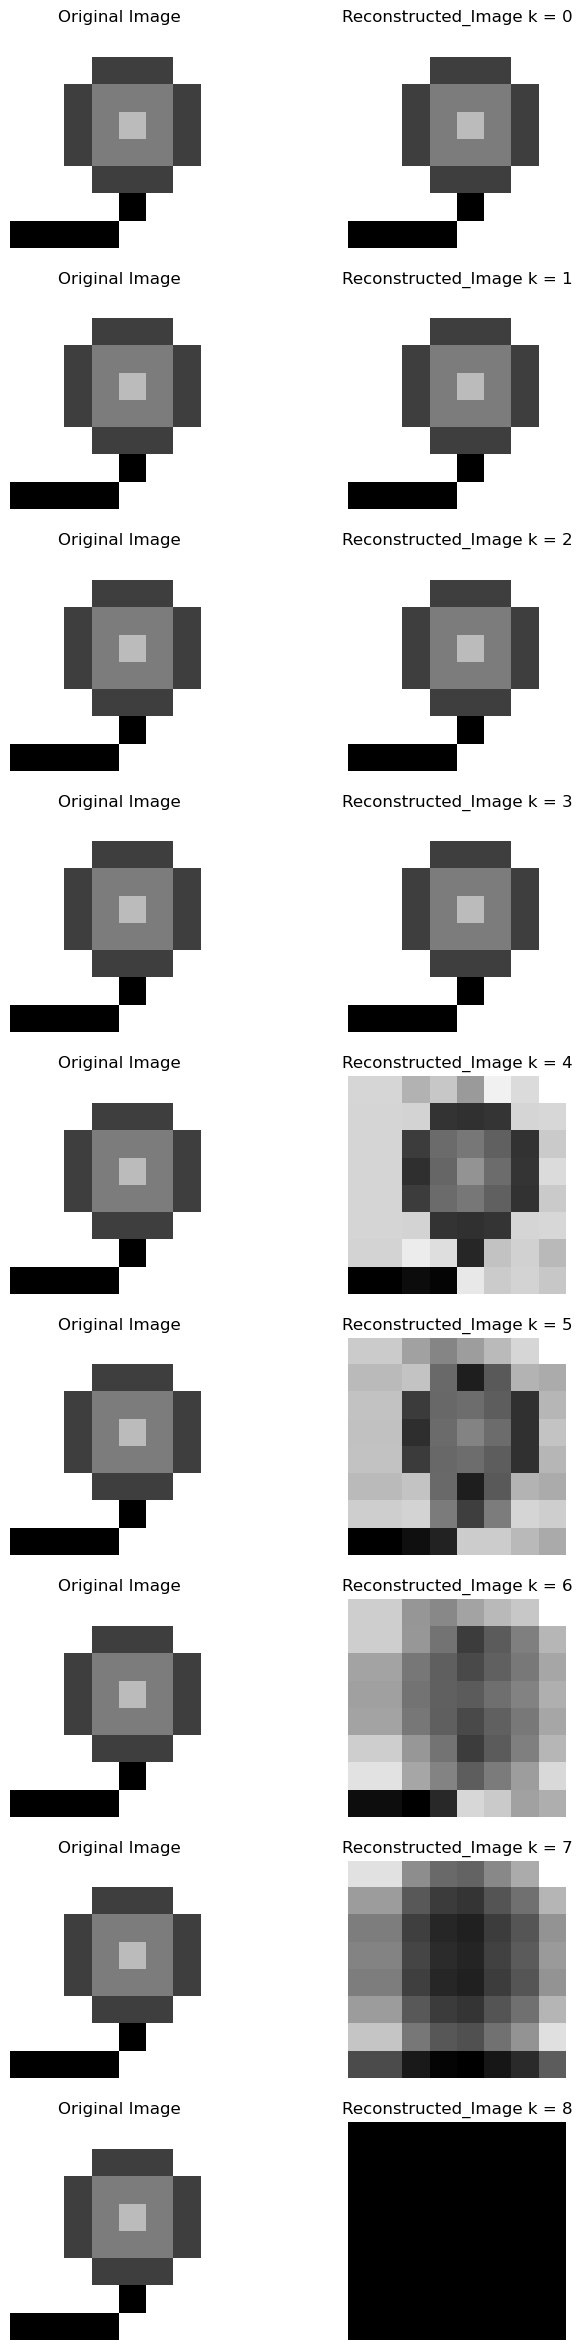

In [34]:
U, s, Vh = SVD(img) 
squared_errors = [] 
sum_of_k_sigmas = []
k_t = len(s)+1
fig, ax = plt.subplots(k_t, 2, figsize=(8, 30))
curr_fig = 0
for k in range(len(s)+1):
    img1_reconstructed = reconsrtuct_from_SVD(U, s, Vh, k=k) 
    ax[curr_fig][0].imshow(img,cmap="gray")
    ax[curr_fig][0].set_title("Original Image")
    ax[curr_fig, 0].axis('off')
    ax[curr_fig][1].set_title("Reconstructed_Image k = "+str(k))
    ax[curr_fig][1].imshow(img1_reconstructed,cmap="gray")
    ax[curr_fig, 1].axis('off')
    curr_fig += 1  
    squared_errors.append(np.sum(np.square(img - img1_reconstructed))) 
    sum_of_k_sigmas.append(np.sum(np.square(s[len(s)-k:]))) 
plt.show()

In [35]:
print(squared_errors)

[5.982802213649264e-11, 5.982802213649264e-11, 1.779084034819656e-11, 2.7292315401239972e-24, 11882.741002648381, 46673.59900584808, 118411.92126534512, 230033.44450113855, 2823450.0]


In [36]:
print(sum_of_k_sigmas)

[0.0, 0.0, 2.0071309993919074e-11, 4.014261998783815e-11, 11882.741002648441, 46673.59900584814, 118411.92126534527, 230033.44450113887, 2823450.000000002]


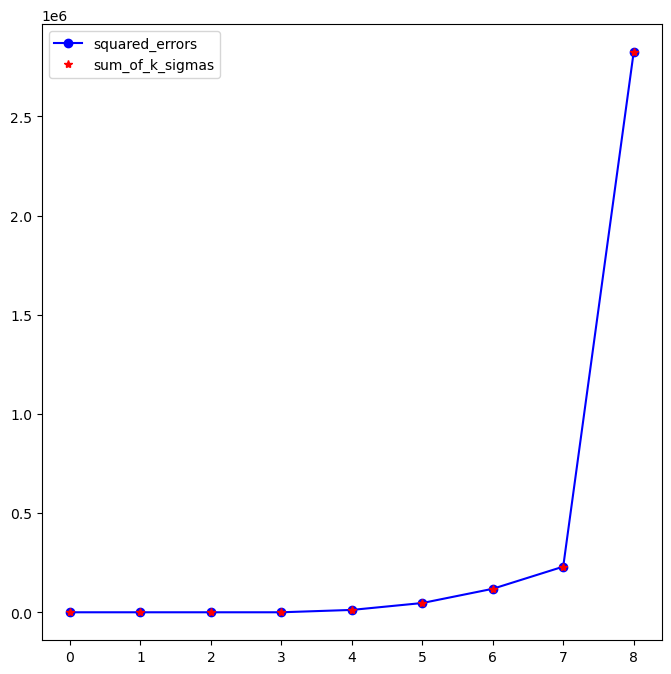

In [37]:
plt.figure(figsize=[8,8])
X = np.arange(9)
plt.plot(X,squared_errors,'bo-')
plt.plot(X,sum_of_k_sigmas,'r*')
plt.legend(["squared_errors","sum_of_k_sigmas"]);

From the values we can conclude that the squared errors of img and the reconstructed image is almost equal to the sum of squares of removed singular values